# Image Processing Test Case V4.0 :
## image processing titanium image Ti64BFi20xBWsharpened2.jpeg

## Code by: Guy Bowker, Joshua Collins. Group 1 - RSEP

In this image processing test-case the microstructural grains in an image will be isolated using the 'skikit-image' processing package, and a new image file and image data file saved.

The image used in this test case was provided by and use of approved by Pratheek Shanthraj, University of Manchester.

### 1. Importing Packages

First the required packages and sub-packages much be imported.

In [2]:
import skimage
from skimage import data, io, filters
from skimage.color import rgb2gray
from skimage import exposure
from skimage.filters import sobel
from skimage.morphology import watershed
from scipy import ndimage as ndi
from skimage import measure

import os
import numpy as np
import matplotlib.pyplot as plt
print('done')

done


### 2. Reading the Image

The image to be processed is a optical image of a titanium 6-4 (grade 5) microstructure.

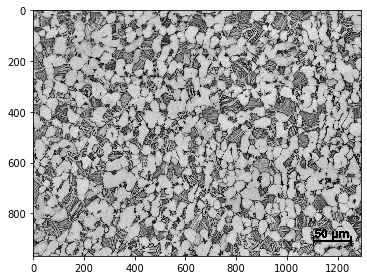

[[ 62 104 162 ... 210 213 214]
 [ 80 113 148 ... 208 187 176]
 [ 61  71  96 ... 213 211 217]
 ...
 [162 169 173 ... 129 104 109]
 [115  77  91 ...  83 105 181]
 [111  76  87 ...  91 125 159]]


In [18]:
grains = io.imread('Ti64BFi20xBWsharpened2.jpg')

io.imshow(grains)
io.show()
print(grains)

Let's check the image type and shape.

In [4]:
print('The image type is:', grains.dtype, ', and its shape is:', grains.shape)

The image type is: uint8 , and its shape is: (968, 1292)


This means our image array made up of integers and only has 2 colour channels (i.e. a grayscale image).

### 3. Manipulating the Image

Now let us adjust the exposure in the image so that the grain boundaries are easier to distinguish.

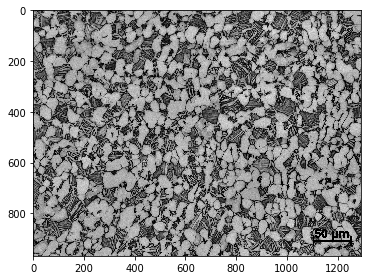

In [29]:
img = grains
image = exposure.adjust_gamma(img,1.5)
io.imshow(image)

### 4. Segmenting the Image

The image processing technique used here will use a region-based method using a watershed transform to segment each individual grain. 

First, we need to create an elevation map using the Sobel gradient of the image.

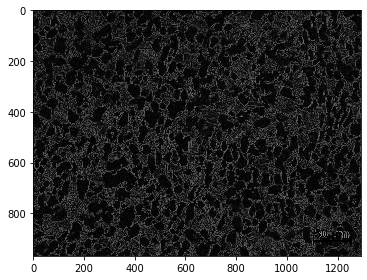

In [30]:
elevation_map = sobel(image)
io.imshow(elevation_map)

Next we will find markers between the background and the grains based on the extreme parts of a histogram of gray values, set these points to either fully black or fully white to binarise the image into its respective phases, save the image, and save the image data as a .CSV file to be read later:

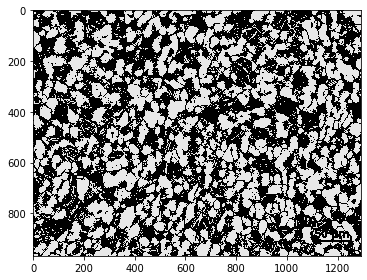

In [68]:
markers = np.zeros_like(image)
markers[image > 150] = 1000 # greater than sign here switched from dark feild image (josh's code)
markers[image < 150] = 0

io.imshow(markers, cmap=plt.get_cmap("gray"))
io.imsave('Ti64BFi20xbinary.jpg',markers)

# ------------------------------------------- #
np.savetxt('new_img_greyscale.csv', markers, delimiter=',')
# ------------------------------------------- #